# NFPA-CBA Example 1 : Single-family dwelling (RES1)

## Notebook initialization

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

## Introduction
This Notebook presents an example application of the prototype methodology for cost-benefit analysis. This case study considers a single-family dwelling. The benefit of sprinkler installation is investigated. The building is adapted from (Butry, 2009). For background on the model and considered input values, see the background document.

The benefit of the sprinkler system relies on an evaluation of the expected cost of fire damages (i) without sprinkler protection, and (ii) with sprinkler protection. The event tree defining the different damage scenarios for the design is visualized below.

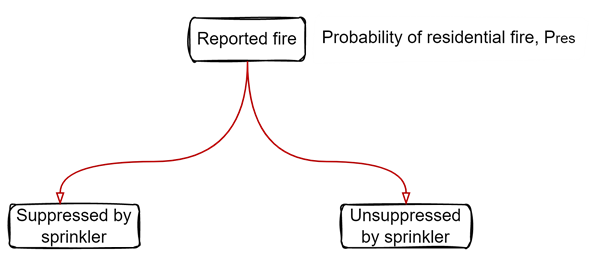

## I. Input
User input in this area.  
Note: All monetary values in 2022 USD.  

### I.1 Building characteristics
Case derived from second example dwelling in Butry (2009). Building area is 2257 ft2 (210 m2). Two stories considered.

In [2]:
S_area = 210 # [m2] Floor area of structure
Construction_Cost = 1305.54 # [USD/m2] Construction cost; 1305.54 evaluated through (RSMeans, 2022), including dectector cost
Demol_cost = 33.53 # [USD/m2] Demolition cost; 33.53 evaluated through (RSMeans, 2022)
Disposal_cost = 14.43 # [USD/m2] Disposal cost; 14.43 evaluated through (RSMeans, 2022)

### I.2 Discount rate and obsolescence rate

In [3]:
g = 0.03 # [1/year] continuous discount rate; 3% based on (Fischer, 2014)
o = 0    # [1/year] obsolescence rate; 0% - building obsolescence neglected

### I.3 Cost of fire protection

#### I.3.a Investment cost fire protection

In [4]:
c_ins_unitcost= 11.68 # [USD/m2] System installation cost; 11.68 for sprinkler installation including water supply for wet pipe sprinkler system evaluated through (RSMeans, 2022)
c_ins = c_ins_unitcost*S_area # [USD] Total system installation cost

#### I.3.b Maintenance cost fire protection

In [5]:
m= 0.05*c_ins  # [USD per year] annual maintenance cost; 5% of sprinkler installation cost based on (Hopkin, 2019) - maintenance cost assumed to include replacement of parts for system lifetime extension

### I.4 Benefit of fire protection 
Benefit evaluation as reduction in cost of fire losses, assessed through flowchart listed in the Introduction.  
See background document for discussion.

#### I.4.a Fire frequency

In [6]:
## fire frequency
lambda_fi= 0.00151 # [1/year] fire frequency per dwelling (ignition frequency + unsuccesful immediate suppression by occupants); 0.00151 based on (Manes and Rush, 2019) 

#### 1.4.b Sprinkler reliability

In [7]:
psup_sp = 0.95 # [-] probability of succesful fire suppression by sprinklers; 0.92-0.98 based on (Vassart et al., 2014)

#### I.4.c Fire-induced losses

In [8]:
## valuation of risk to life
VSL = 5.657*10**6 # [2022 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
xi_in = (0.047 * VSL) # [2022 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)

In [9]:
## [fatalities/fire]
Nf_civilian = 7.4/1000 # [fatality/fire] probability of civilian fatalities; 7.4 fatalities per 1000 residential fires based on (NFPA 2022)
Nf_firefighter_on_ground = 2.4/1e5 # [fatality/fire] probability of firefighter fireground fatality; 2.4/1e5 based on (NFPA, 2022)
Nf_firefighter_response = 2.2/1e5 # [fatality/fire] probability of firefighter response fatality; 2.2/1e5 based on (NFPA, 2022)

In [10]:
## [injuries/fire]
Nin_civilian = 3/100 # [injury/fire] civilian injuries; 3 injuries per 100 reported fires based on (NFPA, 2022)
Nin_firefighter_on_ground = 1.62/100 # [injury/fire] firefighter fireground injuries; 1.62 injuries per 100 reported fires based on (NFPA, 2022)
Nin_firefighter_response = 0.37/100 # [injury/fire] firefighter response injuries; 0.37 injuries per 100 reported fires based on (NFPA, 2022)

In [11]:
## property loss
S_loss_0 = 35.69 # [m2] average damage area in case of sprinkler suppression; 35.69 based on (Manes and Rush, 2019)
S_loss_s = 4.92 # [m2] average damage area in case of sprinkler suppression; 4.92 based on (Manes and Rush, 2019)
eps_loss_content = 1.5 # [-] property loss multiplication factor; eps_loss = ((building loss + content loss) / building loss); 1.5 based on (FEMA, 2015)
eps_loss_indirect = 1.1 # [-] total property loss multiplication factor accounting for indirect costs; 1.1 based on (Ramachandran, 1998)

## II. Design fire risk evaluation

### II.1 Calculation of fire scenario parameters
Input parameter calculation from raw input data.

In [12]:
## Unit replacement cost
Replace_cost = Construction_Cost + Demol_cost + Disposal_cost # [USD/m2] replacement cost as sum of demolition, disposal and reconstruction

### II.2 Scenario consequence evaluation
Evaluation of consequences for identified scenarios (event tree)

#### II.2.a Scenario "no sprinkler suppression"

In [13]:
### Fatalities and injuries
# fatality rate
Nf_0 = Nf_civilian + Nf_firefighter_on_ground + Nf_firefighter_response # [fatality/fire] total fatality rate without sprinkler suppression
# injury rate
Nin_0 = Nin_civilian + Nin_firefighter_on_ground + Nin_firefighter_response  # [injury/fire] total injury rate without sprinkler suppression

In [14]:
### Valuation of fatalities and injuries
# fatality valuation
Df_0=Nf_0*VSL # [USD/fire] valuation expected life loss
# injury valuation
Din_0=Nin_0*xi_in # [USD/fire] valuation expected injuries

In [15]:
### Material loss
xi_d_0= S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

In [16]:
### Total loss valuation
D0=Df_0+Din_0+xi_d_0 # expected value fire-induced loss, scenario "no sprinkler suppression"

#### II.2.b Scenario "successful sprinkler suppression"

In [17]:
### Fatalities and injuries
# fatality rate
# no fire-induced fatalities in case of succesful sprinkler suppression, based on (Butry, 2009); 
# only fire fighter response fatalities considered
Nf_s = Nf_firefighter_response # [fatalities/fire] total fatality rate in case of sprinkler suppression

# injury rate and valuation
# reduction in civilian injuries in case of succesful sprinkler suppression, based on (Butry, 2009)
# only fire fighter response fatalities considered
redux_Nin_civ=0.57 # [-] reduction factor for civilian injuries; 57% reduction in civilian injuries, based on (Butry, 2009)
Nin_s = (1-redux_Nin_civ)*Nin_civilian + Nin_firefighter_response # [injury/fire] total injury rate in case of sprinkler suppression

In [18]:
### Valuation of fatalities and injuries
# fatality valuation
Df_s=Nf_s*VSL # [USD/fire] valuation expected life loss
# injury valuation
Din_s=Nin_s*xi_in # [USD/fire] valuation expected injuries

In [19]:
### Material loss
xi_d_s= S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD/fire] property loss given fire in case of succesful sprinkler suppression

In [20]:
### Total loss valuation
Dsup=Df_s+Din_s+xi_d_s # [USD/fire] expected value fire-induced loss, scenario "successful sprinkler suppression"

## III. PNV calculation

### III.1 Total safety system cost *C+A*

#### III.1.a Investment cost, *C<sub>I</sub>*

In [21]:
C_I=c_ins # PNV investment cost

#### III.1.b Maintenance cost, *C<sub>M</sub>*

In [22]:
C_M=m/g # PNV of maintenace cost

#### III.1.c Obsolescence cost, *C<sub>A</sub>*

In [23]:
C_A=C_I*o/g # PNV of obsolescence cost

#### III.1.d Total safety system cost *C+A*

In [24]:
net_C=C_I+C_M+C_A # total PNV investment cost (investment cost and maintenance cost)

### III.2 Net benefit *B-D*

#### III.2.a Fire-induced losses reference design, *B*
Reference design without sprinkler protection. Single scenario in event tree: scenario "no sprinkler suppression".

In [25]:
## Expected loss reference design
Dref=D0 # [USD/fire]

In [26]:
## PNV reference design
B=Dref*lambda_fi/g # [USD] PNV fire-induced losses reference design

#### III.2.b Fire-induced losses trial design, *D*
The trial design considers the additional safety feature of a sprinkler system.  
The sprinkler system has a reliability psup_sup.  
The overall design performance is a combination of the scenario "no sprinkler suppression" (with probability 1-psup_sp) and the scenario "successful sprinkler suppression" (with probability psup_sp).

In [27]:
## Expected loss design with sprinkler protection
Dsp=(1-psup_sp)*D0+psup_sp*Dsup # [USD/fire]

In [28]:
## PNV reference design
D=Dsp*lambda_fi/g # [USD] PNV expected risk to life reference design

#### III.2.c PNV net benefit, *B-D*

In [29]:
netB=B-D # [USD] PNV net benefit

## IV. Cost-Benefit evaluation

In [30]:
BCR=netB/net_C # [-] benefit cost ratio
Z=netB-net_C # [USD] PNV of proposed safety measure
print("BCR = {0:.2f} and CBR = {1:.2f}\nThe PNV is {2:.0f} [USD]".format(BCR,1/BCR,Z))
print(netB)

BCR = 0.87 and CBR = 1.14
The PNV is -823 [USD]
5717.401079684167


# Example 1 - Parameter study and visualizations

### Visualization of cost distribution design alternatives

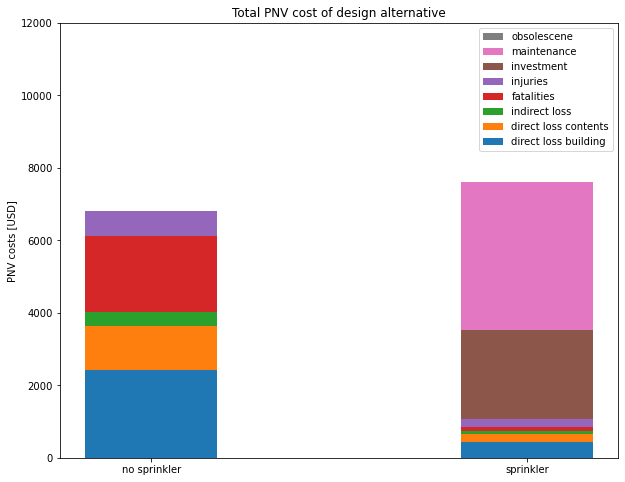

In [31]:
### Design alternatives- With and without sprinklers

## Investment costs
Investment_spr=np.array([C_I,C_M,C_A]) # [USD] array of PNV investment costs for case without sprinklers (investment, maintenance, obsolescence)
Investment_nospr=np.array([0,0,0]) # [USD] array of PNV investment costs for case without sprinklers (investment, maintenance, obsolescence)

### Two scenarios (Fire suppressed by sprinkler and unsuppressed by sprinkler)
## Scenario unsuppressed by sprinklers
# valuation of risk to life
Df_0=Nf_0*VSL # [USD/fire] valuation expected life loss
Din_0=Nin_0*xi_in # [USD/fire] valuation expected injuries

# valuation of material losses
xd_direct_0= S_loss_0 * Replace_cost # [USD] direct property loss related to the building itself
xd_contents_0 = xd_direct_0*(eps_loss_content-1) # [USD] direct property loss related to the contents
xd_indirect_0 = xd_direct_0*(eps_loss_content) *(eps_loss_indirect-1) # indirect losses

# Array of costs and PNV evaluation
Costs_0 = np.array([xd_direct_0,xd_contents_0,xd_indirect_0,Df_0,Din_0])
Costs_0 = Costs_0 * lambda_fi/g

## Scenario suppressed by sprinklers
# valuation of risk to life
Df_s=Nf_s*VSL # [USD/fire] valuation expected life loss
Din_s=Nin_s*xi_in # [USD/fire] valuation expected injuries

# valuation of material losses
xd_direct_s= S_loss_s * Replace_cost # [USD] direct property loss related to the building itself
xd_contents_s = xd_direct_s*(eps_loss_content-1) # [USD] direct property loss related to the contents
xd_indirect_s = xd_direct_s*(eps_loss_content) *(eps_loss_indirect-1) # indirect losses

# Array of costs and PNV evaluation
Costs_s = np.array([xd_direct_s,xd_contents_s,xd_indirect_s,Df_s,Din_s])
Costs_s = Costs_s*lambda_fi/g

### Costs per design
## Design A, no sprinkler system, 
psup_sp = 0 # No sprinkler system present
Costs_no_spr = (1-psup_sp) * Costs_0 + psup_sp * Costs_s
TotalCost_no_spr=np.append(Costs_no_spr,Investment_nospr)

## Design B, with sprinkler system
psup_sp = 0.95 # [-] probability of succesful fire suppression by sprinklers; 0.95 based on (Vassart et al., 2012)
Costs_spr = (1-psup_sp) * Costs_0 + psup_sp * Costs_s
TotalCost_spr=np.append(Costs_spr,Investment_spr)

### Visualization of cost distribution per design
fig, ax = plt.subplots()
labels=['no sprinkler','sprinkler']
categories=['direct loss building','direct loss contents','indirect loss','fatalities','injuries','investment','maintenance','obsolescene']
bar_width = 0.35
opacity = 0.8

cumCost=np.array([0,0])
for i, cat in enumerate(categories):
    ax.bar(labels,[TotalCost_no_spr[i],TotalCost_spr[i]],bar_width,bottom=cumCost,label=cat)
    cumCost=cumCost+np.array([TotalCost_no_spr[i],TotalCost_spr[i]])

ax.set_ylim((0,12000))
ax.set_ylabel('PNV costs [USD]')
plt.title('Total PNV cost of design alternative')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
fig.set_size_inches(10,8)


### Parameter study with VSL and efficiency of sprinkler system

#### Function definition PNV Z, to allow parameter study VSL,psup_sp and eps_loss_indirect

In [32]:
# Function combining above model assumption for parameter study

def Zvalue(VSL,psup_sp,eps_loss_indirect):
    ## I. Input ##
    ##############
    ## I.4.c Fire-induced losses
    xi_in = (0.047 * VSL) # [2021 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)
    
    ## II. Design fire risk evaluation ##
    #####################################    
    ## II.2.a Scenario "no sprinkler suppression"
    ### Valuation of fatalities and injuries
    Df_0=Nf_0*VSL # [USD/fire] valuation expected life loss
    Din_0=Nin_0*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_0= S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D0=Df_0+Din_0+xi_d_0 # expected value fire-induced loss, scenario "no sprinkler suppression"
    
    ## II.2.b Scenario "successful sprinkler suppression"
    ### Valuation of fatalities and injuries
    Df_s=Nf_s*VSL # [USD/fire] valuation expected life loss
    Din_s=Nin_s*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_s= S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD/fire] property loss given fire in case of succesful sprinkler suppression
    ### Total loss valuation
    Dsup=Df_s+Din_s+xi_d_s # [USD/fire] expected value fire-induced loss, scenario "successful sprinkler suppression"
    
    ## III. PNV calculation ##
    ##########################
    ## III.2.a Fire-induced losses reference design, B
    ## Expected loss reference design
    Dref=D0 # [USD/fire]
    ## PNV reference design
    B=Dref*lambda_fi/g # [USD] PNV fire-induced losses reference design
    
    ## III.2.b Fire-induced losses trial design, D
    ## Expected loss design with sprinkler protection
    Dsp=(1-psup_sp)*D0+psup_sp*Dsup # [USD/fire]
    ## PNV reference design
    D=Dsp*lambda_fi/g # [USD] PNV expected risk to life reference design
    
    ## III.2.c PNV net benefit, B-D
    netB=B-D # [USD] PNV net benefit
    
    ## IV. Cost-Benefit evaluation ##
    #################################
    Z=netB-net_C # [USD] PNV of proposed safety measure
    
    return Z

#### Example of usage function Zvalue

In [33]:
## Example application of function Zvalue - verification base values

# input values
psup_sp = 0.95 # [-] probability of succesful fire suppression by sprinklers; 0.95 based on (Vassart et al., 2012)
VSL = 5.657*10**6 # [2021 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
eps_loss_indirect = 1.1 # [-] total property loss multiplication factor accounting for indirect costs; 1.1 based on (Ramachandran, 1998)

# CBA 
Z=Zvalue(VSL,psup_sp,eps_loss_indirect) # [USD] PNV of proposed safety measure
print("The PNV is {0:.0f} [USD]".format(Z))

The PNV is -823 [USD]


#### Parameter study and visualization

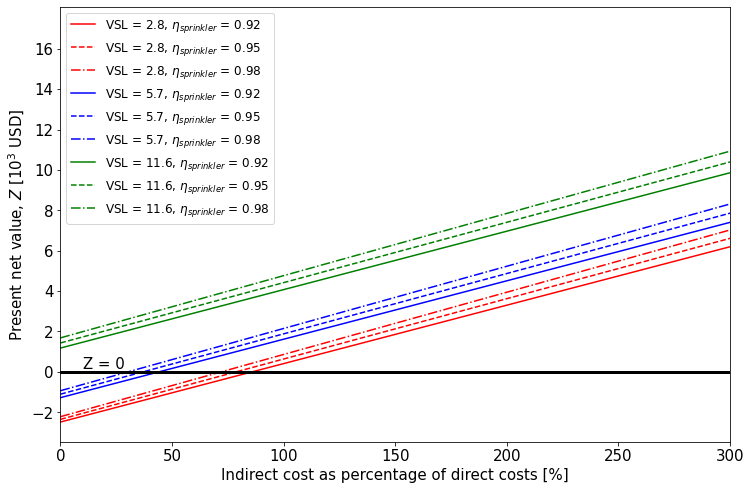

In [34]:
plt.rcParams.update({'font.size': 15})

VSLs = np.array([2.8, 5.7, 11.6]) *1e+6 # [USD]; note: 11.6 USD listed by (Department of Transportation, 2011)
eta_sprinkler = np.array([0.92,0.95,0.98])
Ind_cost = np.array([0,2,5,10,20,50,100,200,300,400,500])


nCases = len(VSLs)*len(eta_sprinkler)

m_eta_sprinkler,m_VSL = np.meshgrid(eta_sprinkler,VSLs)
m_VSL = m_VSL.ravel();m_eta_sprinkler = m_eta_sprinkler.ravel()

m_Z = np.zeros((len(Ind_cost),len(m_VSL)))

for num in np.arange(len(m_VSL)):
    m_Z[:,num] = Zvalue(m_VSL[num],m_eta_sprinkler[num],1+Ind_cost/100)

# Plot the data
fig,ax = plt.subplots(1,1)

color = (['r','r','r','b','b','b','g','g','g'])
linestyle = (['solid','dashed','dashdot','solid','dashed','dashdot','solid','dashed','dashdot'])

legends = []
for num in np.arange(len(m_VSL)):
    ax.plot(Ind_cost,m_Z[:,num]/1e3,linestyle=linestyle[num],color=color[num])
    legends.append('VSL = '+str(m_VSL[num]/1e6)+', $\eta_{sprinkler}$ = '+str(m_eta_sprinkler[num]))

ax.plot([0,300],[0,0],linestyle='solid',color='k',linewidth=3.0)
ax.text(10,0.15,'Z = 0')
ax.set_xlim([0,300])
ax.set_yticks([-2,0,2,4,6,8,10,12,14,16])
ax.set_xlabel('Indirect cost as percentage of direct costs [%]') 
ax.set_ylabel('Present net value, $Z$ [$10^3 $ USD]')
ax.legend(legends,fontsize=12)

fig.set_size_inches(12,8)